Why are the missing values:
1. people hesitate to fill all values
2. survey information is not valid
3. put wrong values to fill quickly
4. mens salary
5. womens age

### types of missing values

### Missing completely at random (MCAR):
    Values in a data set are missing completely at random (MCAR) if the events that lead to any particular
    data-item being missing are independent both of observable variables and of unobservable parameters of
    interest, and occur entirely at random.[5] When data are MCAR, the analysis performed on the data is unbiased;
    however, data are rarely MCAR.
    In the case of MCAR, the missingness of data is unrelated to any study variable: thus, the participants with
    completely observed data are in effect a random sample of all the participants assigned a particular intervention.
    With MCAR, the random assignment of treatments is assumed to be preserved, but that is usually an unrealistically 
    strong assumption in practice.

In [4]:
import pandas as pd

In [46]:
df=pd.read_csv('train.csv')

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Missing completely not at random
 there must be some relation of missing value with other values

In [50]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
df['cabin_null'].mean()

0.7710437710437711

In [51]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0


In [52]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### missing at random (MAR)
men --- salary
womens --- age

### Ways to Handle missing values

1. mean / median / mode
2. random sample imputation
3. capturin NaN values with a new feature
4. end of distribution imputation
5. arbitrary imputation
6. frequent categories imputation

In [53]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0


In [54]:
df.Age.isnull().mean()

0.19865319865319866

In [55]:
median = df.Age.median()

df['Age_median']=df.Age.fillna(value=median)

In [56]:
df.Age.isnull().sum()

177

In [57]:
import seaborn as sns


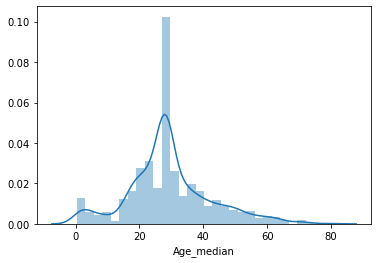

In [58]:
sns.distplot(df.Age_median)

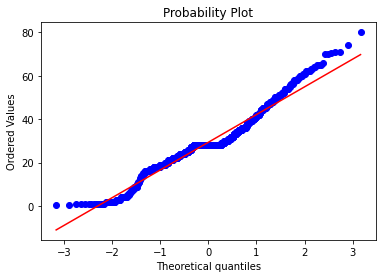

In [60]:
import numpy as np 
import pylab 
import scipy.stats as stats


stats.probplot(df.Age_median, dist="norm", plot=pylab)
pylab.show()

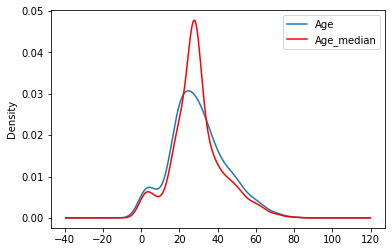

In [63]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax) 
df.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Random Sample Imputation

it will work for when missingness is completely at random

In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('train.csv')

In [5]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
df.Age.isnull().sum() 

177

In [27]:
def random_sample_imputation(df,variable):
    df[variable+'_random'] = df[variable].copy()
    random_sample=df.Age.dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [28]:
random_sample_imputation(df,'Age')


In [31]:
df.Age_random.isnull().sum()

0

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


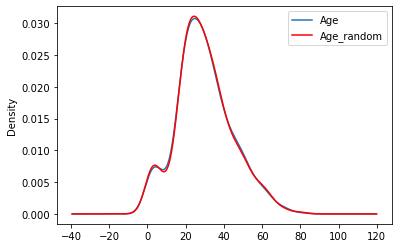

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax) 
df.Age_random.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')